<center><h1 style="font-size:35px; font-family: 'Calisto MT'; letter-spacing: 0.1em; background-color: RGB(128,0,128);"> Statistiques Exploratoire Spatiales (avec R) </h1></center>
<center><h3 style="font-size:25px; font-family: 'Calisto MT'; letter-spacing: 0.1em; background-color: RGB(51,165,182);"> Réalisé par le Groupe R </h3></center>
ENSAE 2024 : ISE1 CL <right> <br> Par : <br> COULIBALY Khadidiatou <br> DIENG Samba <br> ONANENA AMANA Jeanne De La Flèche <br> NDONG Tamsir </right>

<center><h2 style="font-size:28px; font-family: 'Calisto MT'; letter-spacing: 0.1em;"> TP6 </h2></center>

________________________

<h2 style="text-align:center; background-color:RGB(51,165,182);font-size:45px;font-family:Algerian">Les préliminaires...</h2>

<h1 style="font-size:35px; font-family: 'Times New Roman'; letter-spacing: 0.1em;"> CONSIGNE </h1>

1. **Importation et visualisation**
2. **Calcul du nombre d'attaques par admin**
3. **Création de rasters autour des attaques**
4. **Création de rasters pour chaque année et visualisation de nombre d'attaques par année**

<h1 style="font-size:35px; font-family: 'Times New Roman'; letter-spacing: 0.1em;">  Importation des packages </h1>

In [23]:
suppressMessages({
# Charger les bibliothèques nécessaires
library(ggplot2)
library(dplyr)
library(leaflet)
library(sf)
library(raster)
library(terra)
library(leaflet.extras)
library(viridis)
})

<h2 style="text-align:center; background-color:RGB(51,165,182);font-size:45px;font-family:Algerian"> Le TP proprement dit</h2>

In [24]:
# Setting the work directory
setwd("C:/Users/DELL/Documents/ISEP3_2025/Stats_spatiale/Statistique-Exploratoire-Spatiale/TP6")

<h2 style="font-size:35px; font-family: 'Times New Roman'; letter-spacing: 0.1em;">  1. Importation et visualisation </h2>

In [25]:
# Charger les données depuis un fichier CSV
data <- read.csv("data/Points_data.csv")
shp <- st_read("Groupe - R/shapefiles/mli_admbnda_adm1_1m_gov_20211220.shp", quiet= TRUE)

In [26]:
str(data)

'data.frame':	87225 obs. of  31 variables:
 $ event_id_cnty     : chr  "MLI33140" "BFO12659" "BFO12661" "BFO12665" ...
 $ event_date        : chr  "04 October 2024" "04 October 2024" "04 October 2024" "04 October 2024" ...
 $ year              : int  2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 ...
 $ time_precision    : int  1 1 1 1 1 1 1 1 2 1 ...
 $ disorder_type     : chr  "Political violence" "Political violence" "Political violence" "Political violence" ...
 $ event_type        : chr  "Explosions/Remote violence" "Explosions/Remote violence" "Battles" "Battles" ...
 $ sub_event_type    : chr  "Air/drone strike" "Air/drone strike" "Armed clash" "Armed clash" ...
 $ actor1            : chr  "Military Forces of Mali (2021-)" "Military Forces of Burkina Faso (2022-)" "JNIM: Group for Support of Islam and Muslims" "JNIM: Group for Support of Islam and Muslims" ...
 $ assoc_actor_1     : chr  "" "" "" "" ...
 $ inter1            : chr  "State forces" "State forces" "Rebel group" "

In [27]:
# Voyons les noms des variables
colnames(data)

[1] "event_id_cnty"      "event_date"         "year"              
 [4] "time_precision"     "disorder_type"      "event_type"        
 [7] "sub_event_type"     "actor1"             "assoc_actor_1"     
[10] "inter1"             "actor2"             "assoc_actor_2"     
[13] "inter2"             "interaction"        "civilian_targeting"
[16] "iso"                "region"             "country"           
[19] "admin1"             "admin2"             "admin3"            
[22] "location"           "latitude"           "longitude"         
[25] "geo_precision"      "source"             "source_scale"      
[28] "notes"              "fatalities"         "tags"              
[31] "timestamp"

In [28]:
# VOYONS LES PAYS
unique(data$country)

[1] "Mali"          "Burkina Faso"  "Ghana"         "Nigeria"      
 [5] "Benin"         "Guinea"        "Senegal"       "Ivory Coast"  
 [9] "Guinea-Bissau" "Mauritania"    "Niger"         "Togo"         
[13] "Liberia"       "Cape Verde"    "Gambia"        "Sierra Leone"

In [29]:
# Convertir les données en un objet spatial sf
data_spatial <- sf::st_as_sf(data, coords = c("longitude", "latitude"), crs = st_crs(shp))

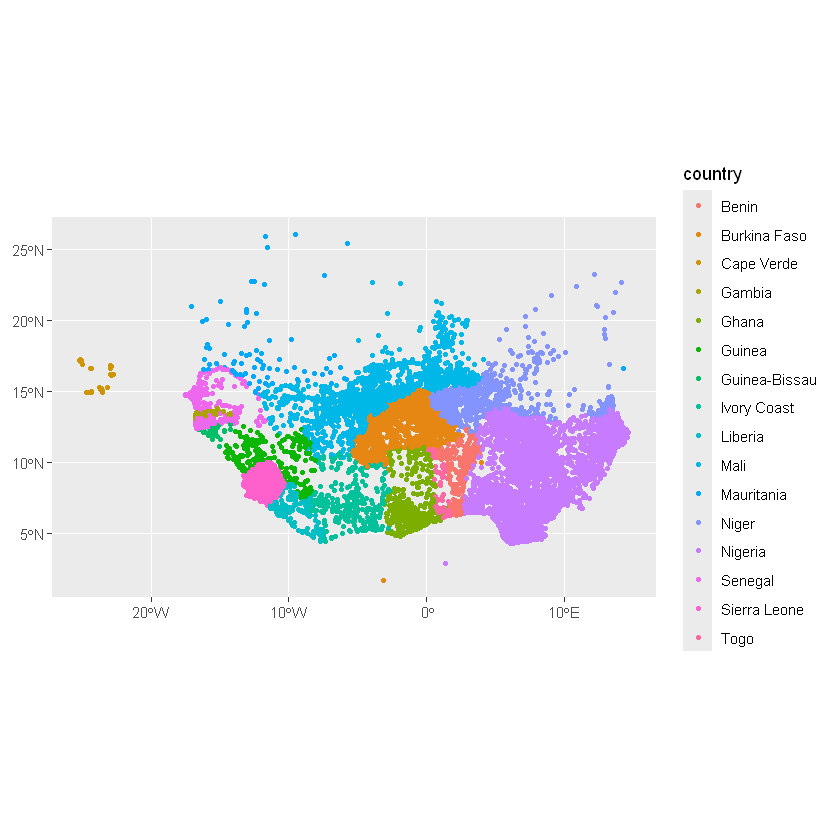

In [30]:
## Voir cela sur leaflet...
# Visualisation pour les différents pays
ggplot(data_spatial) +
    geom_sf(fill = NA, color = "blue", size = 0.5) +
  aes(colour = country) +
  geom_sf(size = 1.2) +
  scale_fill_hue(direction = 1) +
  scale_color_hue(direction = 1)

In [31]:
## Palette de couleurs
country_palette <- country_palette <- colorFactor(viridis(length(unique(data$country)), 
                                            option = "turbo"), domain = data$country)


# Créer une carte interactive
leaflet() %>%
  addTiles() %>%  # Couche de base (OpenStreetMap)

  # Ajouter les limites du Burkina Faso (administration de niveau 0 - national)
  addPolygons(data = shp, color = "brown", weight = 2, opacity = 1, fillOpacity = 0.5,
              popup = ~ADM1_FR) %>%  # Afficher l'information dans une popup

  # Ajouter les points d'événements (assurez-vous que AOI_event est un objet sf avec un CRS défini)
  addCircleMarkers(data = data, weight = 0.1, opacity = 2, fillOpacity = 1.4,
                  radius = 1.5,  # Adjust circle size
                   color = ~country_palette(country)) %>%
    addLegend("bottomright", pal = country_palette, values = data$country,
            title = "Evenements par pays", opacity = 1) %>%
    addResetMapButton()%>%  # Recentrer la carte
    addFullscreenControl()  #ajout du basculement en mode plein écran


Assuming "longitude" and "latitude" are longitude and latitude, respectively



HTML widgets cannot be represented in plain text (need html)

#### On choisit notre zone d'intérêt

In [32]:
# On selectionne notre pays (Area of interest)
AOI = "Mali"

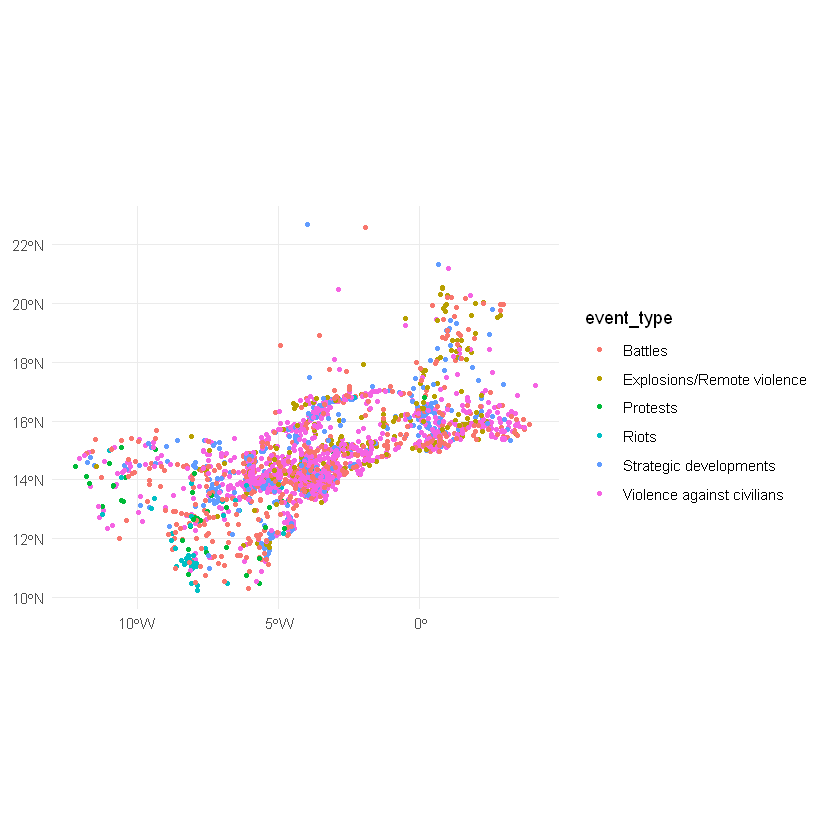

In [33]:
# Filtrer pour le Sénégal
AOI_event <- data_spatial %>%
  filter(country == AOI)

# Visualisation des événements au Sénégal
ggplot(AOI_event) +
  aes(fill = event_type, colour = event_type) +
  geom_sf(size = 1.2) +
  scale_fill_hue(direction = 1) +
  theme_minimal()

In [34]:
## Palette de couleurs
event_palette <- colorFactor(palette = "Set2", domain = AOI_event$event_type)

# Créer une carte interactive
leaflet() %>%
  addTiles() %>%  # Couche de base (OpenStreetMap)

  # Ajouter les limites du Burkina Faso (administration de niveau 0 - national)
  addPolygons(data = shp, color = "brown", weight = 2, opacity = 1, fillOpacity = 0.5,
              popup = ~ADM1_FR) %>%  # Afficher l'information dans une popup

  # Ajouter les points d'événements (assurez-vous que AOI_event est un objet sf avec un CRS défini)
  addCircleMarkers(data = AOI_event, weight = 0.1, opacity = 2, fillOpacity = 1.4,
                  radius = 2,  # Adjust circle size
                   color = ~event_palette(event_type)) %>%
    addLegend("bottomright", pal = event_palette, values = AOI_event$event_type,
            title = "Event Type", opacity = 1) %>%
    addResetMapButton()%>%  # Recentrer la carte
    addFullscreenControl()  #ajout du basculement en mode plein écran


HTML widgets cannot be represented in plain text (need html)

<h2 style="font-size:35px; font-family: 'Times New Roman'; letter-spacing: 0.1em;">  2. Calcul du nombre d'évènements par admin (0-3) </h2>

In [35]:
# On joint les deux
points_ml<- st_join(data_spatial, shp, join = st_intersects)

In [36]:
points_ml %>% data.frame() %>% tail(5)

event_id_cnty event_date      year time_precision disorder_type         
87221 SIE2          01 January 1997 1997 3              Political violence    
87222 SIE3          01 January 1997 1997 3              Political violence    
87223 SIE6          01 January 1997 1997 3              Political violence    
87224 SIE7          01 January 1997 1997 3              Political violence    
87225 SIE8          01 January 1997 1997 3              Strategic developments
      event_type                 sub_event_type                  
87221 Battles                    Government regains territory    
87222 Battles                    Armed clash                     
87223 Violence against civilians Attack                          
87224 Battles                    Armed clash                     
87225 Strategic developments     Headquarters or base established
      actor1                                      assoc_actor_1
87221 Military Forces of Sierra Leone (1996-1997)              
87222 Kamajor Militia                                          
87223 Military Forces of Sierra Leone (1996-1997)              
87224 Kamajor Militia                                          
87225 Military Forces of Sierra Leone (1996-1997)              
      inter1            ⋯ ADM1_PCODE ADM1_REF ADM1ALT1FR ADM1ALT2FR ADM0_FR
87221 State forces      ⋯ NA         NA       NA         NA         NA     
87222 Political militia ⋯ NA         NA       NA         NA         NA     
87223 State forces      ⋯ NA         NA       NA         NA         NA     
87224 Political militia ⋯ NA         NA       NA         NA         NA     
87225 State forces      ⋯ NA         NA       NA         NA         NA     
      ADM0_PCODE date validOn validTo geometry               
87221 NA         <NA> <NA>    <NA>    POINT (-10.9332 8.4642)
87222 NA         <NA> <NA>    <NA>    POINT (-11.7047 8.1221)
87223 NA         <NA> <NA>    <NA>    POINT (-12.4694 7.5317)
87224 NA         <NA> <NA>    <NA>    POINT (-12.338 8.231)  
87225 NA         <NA> <NA>    <NA>    POINT (-12.06 8.2013)

In [37]:
# On garde les points du Mali
points_ml <- points_ml %>% filter(!is.na(ADM1_PCODE))
points_ml %>% data.frame() %>% dim()

[1] 11547    42

In [38]:
## Différence de 6 points...
dim(AOI_event)

[1] 11541    30

## Nombre d'évènements par région

In [39]:
# Compter le nombre de points par région
point_counts <- points_ml %>%
  group_by(ADM1_FR) %>%  #  groupper par régions
  summarise(Nombre_attaques = n())

point_counts %>%
 st_drop_geometry() %>%
data.frame()

ADM1_FR    Nombre_attaques
1  Bamako      446           
2  Gao        1956           
3  Kayes       265           
4  Kidal       935           
5  Koulikoro   429           
6  Menaka      720           
7  Mopti      3852           
8  Sikasso     308           
9  Ségou      1380           
10 Tombouctou 1256

In [40]:
t1 <-table(AOI_event$admin1, AOI_event$event_type) 
t1

            
             Battles Explosions/Remote violence Protests Riots
  Bamako          31                          6      245    65
  Gao            476                        251       78    30
  Kayes           79                          4       75    28
  Kidal          237                        368       44    27
  Koulikoro      132                         54       40    26
  Menaka         211                         93       13     7
  Mopti         1095                        521      105    39
  Segou          410                        199       35    14
  Sikasso         79                         25       44    44
  Tombouctou     300                        216       59    44
            
             Strategic developments Violence against civilians
  Bamako                         58                         41
  Gao                           444                        679
  Kayes                          28                         51
  Kidal                      

In [41]:
t2 <- table(AOI_event$admin2)  %>% data.frame() 
colnames(t2) <- c("division", "nb_events")
head(t2,10)

division       nb_events
1  Abeibara       117      
2  Anderamboukane 109      
3  Ansongo        824      
4  Bafoulabe       32      
5  Bamako         446      
6  Banamba         52      
7  Bandiagara     763      
8  Bankass        481      
9  Baraoueli       12      
10 Bla             14

In [42]:
t3 <- table(AOI_event$admin3)  %>% data.frame()
colnames(t3) <- c("division", "nb_events")
head(t3, 10)

division       nb_events
1  Abeibara        49      
2  Adjelhoc       136      
3  Alafia          44      
4  Anchawadi       96      
5  Anderamboukane 110      
6  Anefif          57      
7  Ansongo        164      
8  Arham            1      
9  Bafoulabe       11      
10 Baguindabougou   1

<h2 style="font-size:35px; font-family: 'Times New Roman'; letter-spacing: 0.1em;"> 3.Création de rasters autours des attaques </h2>

## Création de fonctions

In [45]:
Create_raster <- function(datafile, filename ="Rasterisation.tif") {
        # Reprojeter pour obtenir des unités en mètres
    AOI_prj <- st_transform(datafile, crs = 32629)  # EPSG 32629 pour UTM zone 29N -- pour le Mali
    
    # Définir l'étendue (extent) et la résolution en mètres
    ext <- raster::extent(sf::st_bbox(AOI_prj)) #extent
    res <- 5000  # Résolution de 5 km
    rast_crs <- CRS("+proj=utm +zone=29 +datum=WGS84 +units=m +no_defs")
    
    raster_template <- raster::raster(ext=ext, resolution=res, crs=rast_crs)
    
    # Evènements...
    Raster <- raster::rasterize(AOI_prj,raster_template,field=1, fun= sum)
    
    #Save with GTIFF format
    raster::writeRaster(Raster, filename = filename, format = "GTiff", overwrite = TRUE)
    
    return(Raster)
        
}

In [46]:
AOI_Raster <- Create_raster(AOI_event, "Rasterisation_general.tif")

In [47]:
Create_map <- function(raster){
        ## Palette de couleurs
    pal <- colorNumeric(palette = viridis(1000, option = "viridis"), 
                        domain = raster::values(raster),
                        na.color = "transparent")
    
    # Créer une carte interactive
    leaflet() %>%
      addTiles() %>%  # Couche de base (OpenStreetMap)
    
     addPolygons(data = shp, color = "brown", weight = 2, opacity = 0.2, fillOpacity = 0.1,
                popup = ~ADM1_FR) %>%  
    
      addRasterImage(raster, opacity = 2,colors= pal) %>%
       addLegend(pal = pal, values = raster::values(raster),
        title = "Nombre d'événement") %>%
        addResetMapButton() %>%  # Recentrer la carte
        addFullscreenControl()  #ajout du basculement en mode plein écran  
}



Warning message in colors(.):
"Some values were outside the color scale and will be treated as NA"


HTML widgets cannot be represented in plain text (need html)
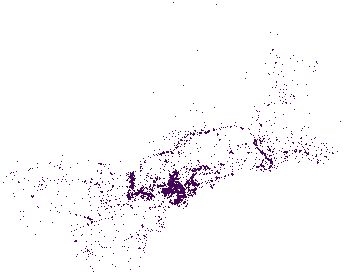

In [48]:
Create_map(AOI_Raster)

In [49]:
summary(raster::values(AOI_Raster))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    1.0     1.0     2.0     5.8     4.5   445.0   94959 

<h2 style="font-size:35px; font-family: 'Times New Roman'; letter-spacing: 0.1em;"> 4.Création de raster pour chaque année </h2>

In [50]:
# VOYONS LES années
unique(data$year)

[1] 2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010
[16] 2009 2008 2007 2006 2005 2004 2003 2002 2001 2000 1999 1998 1997

In [51]:
for( i in unique(data$year)){
    
    assign(paste0("data_", i), data[data$year == i,])
    assign(paste0("AOI_Raster_", i), Create_raster(AOI_event,  paste0("Groupe - R/Rasterisation_", i, ".tif")))

    }

In [52]:
head(data_2020, 2)

event_id_cnty event_date       year time_precision disorder_type     
42787 CDI2482       31 December 2020 2020 1              Political violence
42788 NIG19389      31 December 2020 2020 1              Demonstrations    
      event_type                 sub_event_type       
42787 Violence against civilians Attack               
42788 Riots                      Violent demonstration
      actor1                                 assoc_actor_1 inter1            ⋯
42787 Unidentified Armed Group (Ivory Coast)               Political militia ⋯
42788 Rioters (Nigeria)                                    Rioters           ⋯
      location   latitude longitude geo_precision source                   
42787 Abengourou 6.7297   -3.4964   2             Afrique sur 7; Abidjan TV
42788 Oke Odan   6.7000    2.9000   1             Daily Post (Nigeria)     
      source_scale          
42787 National-International
42788 National              
      notes                                                                                                                                                                                                                                                         
42787 On 31 December 2020, unidentified individuals opened fire on the road toll station of Thomasset town, in the Eastern Ivory Coast, assumedly around Abengourou town (Indenie-Djuablin, Comoe). They destroyed properties. No fatality and/or casualty reported.
42788 On 31 December 2020, youth demonstrators set up bonfires and blocked the International Road in Oke Odan (Egbado South LGA, Ogun) over the killing of another youth by Nigeria Customs Service operatives.                                                     
      fatalities tags                 timestamp 
42787 0                               1610409617
42788 0          crowd size=no report 1610409633

Warning message in colors(.):
"Some values were outside the color scale and will be treated as NA"


HTML widgets cannot be represented in plain text (need html)
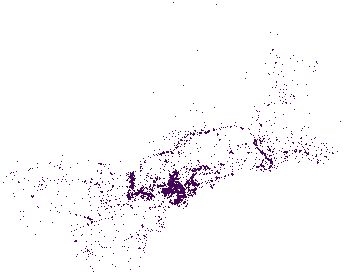

In [53]:
Create_map(AOI_Raster_2020)

In [54]:
t <- data %>% 
    group_by(year, event_type) %>%
summarise(attacks_number =n())

t1 <- data %>% 
    group_by(year) %>%
summarise(attacks_number =n())

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


In [55]:
head(t,3)

year event_type                 attacks_number
1 1997 Battles                    357           
2 1997 Explosions/Remote violence  24           
3 1997 Protests                    47

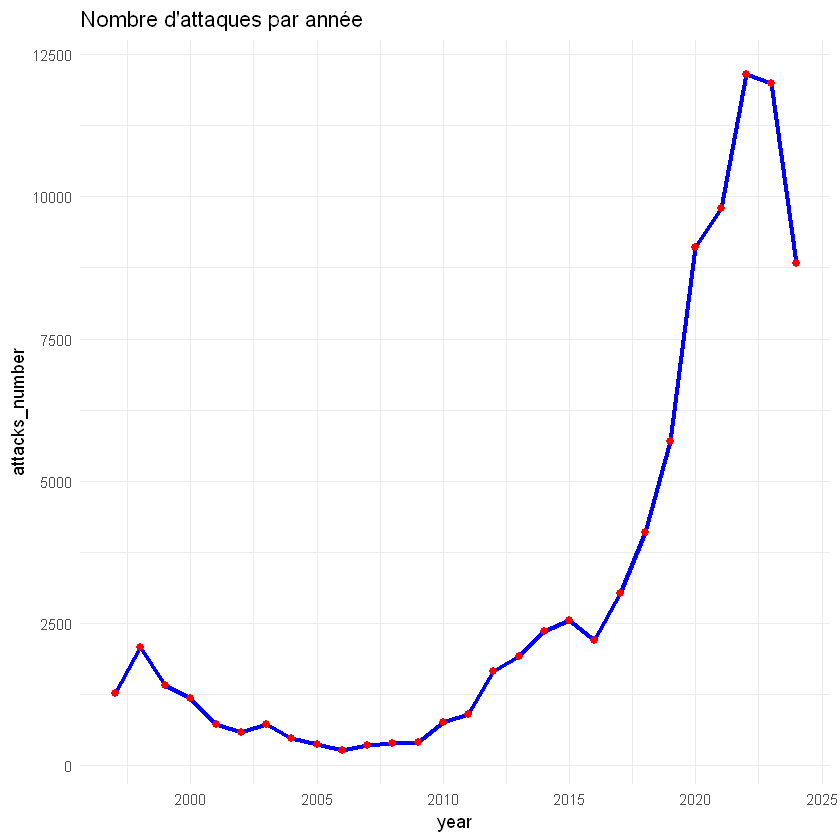

In [60]:

 ggplot(t1, aes(y= attacks_number, x=year))+
 geom_path(linewidth= 1.2, color="blue")+
         geom_point(size=2, color="red")+
 theme_minimal() +
 labs(title = "Nombre d'attaques par année") 

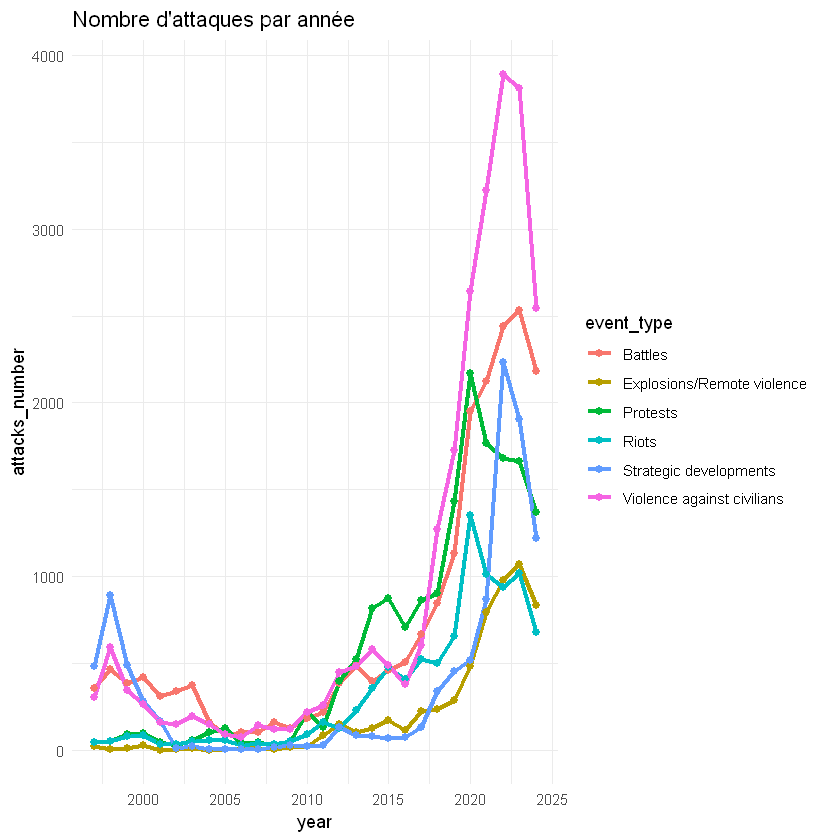

In [61]:

 ggplot(t, aes(y= attacks_number, x=year, color = event_type, group=event_type))+
 geom_path(linewidth= 1.2)+
         geom_point(size=2)+
 theme_minimal() +
 labs(title = "Nombre d'attaques par année") 